- [x] 不同范式下的phase比较
- [0] 不同范式顺序下的区别
- [x] 不同通道的，脑区的平均，or 全脑？？？
    - [x] PCun, 不同范式下运动在PCun的影响
- [0] moving average
- [x] 是否先打手来做分组的平均
    - [0] 分时段和分行为的平均
    - [x] tapping time locking

- [0] 不同脑区间的corr？？？
    - [0] cingulate， precuneus和occipital的连接关联，有没有共同的上游

- [0] entrain时候的phase


- [ ] entrain的量化标准

---

- [小鸣] 打手范式下，打手的动作和entrain活动之间的关联.

- **刺激前发生打手动作的脑电power spectrum和相关脑区(按照打手来区分)**
     - [x] **tapping lock**
     - [x] stimulus locking

- [ ] 所有记录脑区与光刺激的 correlation, entrain 情况及相对 delay

- [见上] 不同范式下不同脑区stage 1-4的phase lock情况。

- [x] 行为学对照组

In [182]:
# import ipyparallel as ipp
from multiprocessing import Pool

import EEGAnalysis as ea
import h5py
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import re, os
from tqdm import tqdm

tspec = np.linspace(-3,3,12000)

_dataset = h5py.File('./zhouchen-5-theta.h5', 'r')
# _dataset = h5py.File('./zhouchen-5-delta-tapping-lock.h5', 'r')

_dates = list(_dataset.keys())
print(_dates)

# _dataset.close()

['180827', '180829', '180831', '180901', '180902', '180903', '180904']


In [189]:
_behavior = pd.read_csv('zhouchen-behavior-final.csv', dtype={'date':'str'})
check_behavior_prediction = lambda x,y,z: _behavior.time[(_behavior.paradigm == x) & (_behavior['date'] == y)].values < z
_behavior.head()

,date,paradigm,time,trial
0,180827,1-10,0.52,1
1,180827,1-10,0.32,2
2,180827,1-10,-0.44,3
3,180827,1-10,-0.12,4
4,180827,1-10,-0.04,5


In [194]:
_location = pd.read_csv('/media/STORAGE/EEG/electrode_layout/layout_zhouchen/zhouchen_tal_coord.td.fill.csv')

_c = ['Brodmann area 23', 'Brodmann area 24', 'Brodmann area 31', 'Brodmann area 32', 'Brodmann area 33', ]  # Cingulate
_c = ['Brodmann area 17', 'Brodmann area 18', 'Brodmann area 19', ]  # Visual
_c = ['Brodmann area 7', ]  # PCun

_target = np.ones(shape=(0,), dtype='int')
for item in _c:
    _stack = _location['Record Number'][_location['Level 5'] == item].values
    print(item, np.unique(_stack))
    _target = np.hstack((_target, _stack))
_target = np.unique(_target)
_target

Brodmann area 7 [27 28 29 30 31 32]


array([27, 28, 29, 30, 31, 32])

---

分时段和分行为的phase平均

In [190]:
# %%time 
_result = {
    'with': {0:[], 1:[], 2:[], 3:[], 4:[]},
    'without': {0:[], 1:[], 2:[], 3:[], 4:[]}
}

for idate in _dates:
    if idate[-1] != '1':
        continue
    _prediction = check_behavior_prediction('%s-5'%(idate[-1]), idate[:6], 0).reshape((5, -1))
    
    for chidx in _target:
        _entry = np.array(_dataset[idate]['1']['%03d'%chidx]).reshape((5,4,-1))
        for qi in range(5):
            _result['with'][qi].append(_entry[qi][_prediction[qi]])
            _result['without'][qi].append(_entry[qi][~_prediction[qi]])
    

(50, 12000)
(50, 12000)
(50, 12000)
(60, 12000)
(70, 12000)


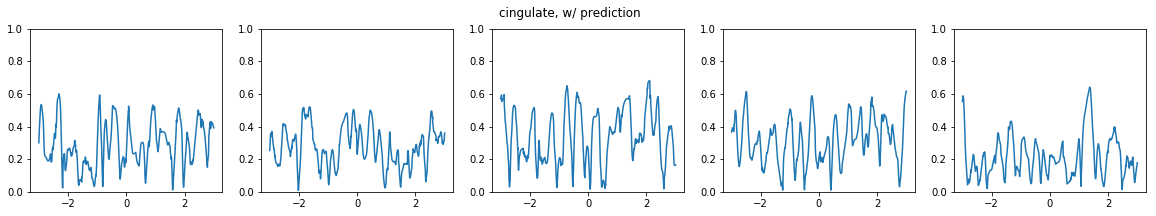

In [192]:
plt.figure(figsize=(4*5,3))

for qi in range(5):
    _temp = []
    for item in _result['with'][qi]:
        [_temp.append(i) for i in item]

    _tmp = np.array(_temp)
    print(_tmp.shape)

    _itpc = ea.decomposition.dwt_itpc([_tmp])[0]

    plt.subplot(1,5,qi+1)
    plt.plot(tspec, _itpc)
    plt.ylim((0,1))

plt.suptitle('cingulate, w/ prediction')
plt.show()

---
tapping time locking

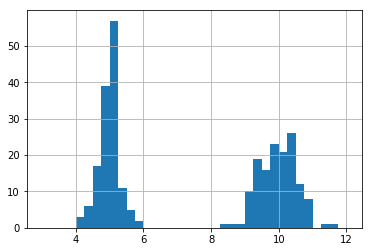

In [123]:
_behavior.time.hist(range=(3,12), bins=36)